In [ ]:
# Description: This program attempts to optimize a users portfolio using Efficient Frontier

In [2]:
pip install pandas-datareader

In [3]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# Get the stock symbols/ tickers in the portfolio
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [5]:
# Assign weights to the stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [6]:
# Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [7]:
# Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-08-08'

In [8]:
# Create a dataframe to store the adjusted close price of stocks
df = pd.DataFrame()

# Store the adjusted close price in the df
for stock in assets:
    df[stock]= web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

In [9]:
# show the dataframe
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.378807,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.515701,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.635078,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.249001,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.424622,13.880000,365.280823
...,...,...,...,...,...
2020-08-03,251.960007,3111.889893,434.965759,498.619995,1474.449951
2020-08-04,249.830002,3138.830078,437.870514,509.640015,1464.969971
2020-08-05,249.119995,3205.030029,439.457642,502.109985,1473.609985


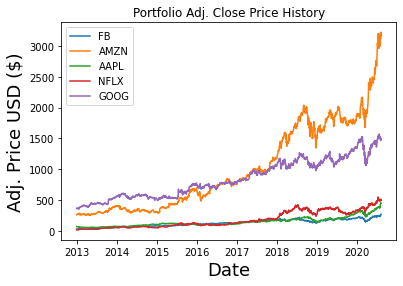

In [10]:
# Visually show the stock
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [11]:
# show the daily returns
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-08-03,-0.006741,-0.016681,0.025198,0.019923,-0.005739
2020-08-04,-0.008454,0.008657,0.006678,0.022101,-0.006430
2020-08-05,-0.002842,0.021091,0.003625,-0.014775,0.005898


In [12]:
# create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117348,0.052715,0.042448,0.054601,0.048801
AMZN,0.052715,0.092741,0.036639,0.061688,0.046750
AAPL,0.042448,0.036639,0.078009,0.032439,0.037261
NFLX,0.054601,0.061688,0.032439,0.212082,0.048971
GOOG,0.048801,0.046750,0.037261,0.048971,0.065011


In [13]:
# calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.059592653433027956

In [14]:
# Calculate the portfolio volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24411606549555062

In [15]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()* weights) * 252
portfolioSimpleAnnualReturn

0.3637935763014299

In [17]:
# Show the expected annual return, volatility (risk) and variance

percent_var = str(round(port_variance,4)*100) + '%'
percent_vol = str(round(port_volatility,4)*100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,4)*100) + '%'

print('Expected annual return: ', percent_ret)
print('Annual volatility(risk): ', percent_vol)
print('Annual variance: ', percent_var)

Expected annual return:  36.38%
Annual volatility(risk):  24.41%
Annual variance:  5.96%


In [18]:
pip install PyPortfolioOpt

In [19]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns 

In [20]:
# Portfolio Optimization 

# Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights  = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.13555), ('AMZN', 0.29634), ('AAPL', 0.26205), ('NFLX', 0.30606), ('GOOG', 0.0)])
Expected annual return: 41.3%
Annual volatility: 26.3%
Sharpe Ratio: 1.49


(0.41255292546447064, 0.26341720441999966, 1.4902326760653546)

In [33]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Remaining Funds: ${:.2f}'.format(leftover))

Discrete Allocation:  {'FB': 4.0, 'AMZN': 1.0, 'AAPL': 6.0, 'NFLX': 6.0}
Remaining Funds: $123.70
